# DATA SCIENCE INTERN @BHARAT INTERN

# NAME:MASINA VENKATA HANUMA SIVA MANIKANTA

# Task 2: Handwritten Digit Recognition Using MNIST Dataset With The Help Of Neural Network.

# About Dataset

MNIST is a commonly used dataset in machine learning and computer vision research, which consists of a set of 70,000 images of handwritten digits (0-9), each of size 28x28 pixels. The dataset is split into two sets: a training set of 60,000 images and a test set of 10,000 images. The training set is used to train a machine learning model, while the test set is used to evaluate the model's performance.

In [34]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [35]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

The Above Code Reflects that the Dataset Contains :

1.An array of 60,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255

2.An array of 60,000 labels, each representing the correct digit (0-9) for the 1.

3.An array of 10,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255.

4.An array of 10,000 labels, each representing the correct digit (0-9) for the 3.

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [39]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [40]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [41]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


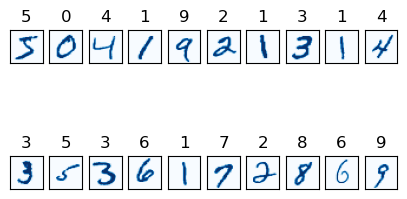

In [42]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [43]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [44]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.41270044,  0.14861552, -0.59844315, -0.21230829,  0.537135  ,
         0.11185651,  0.75578076,  0.2292678 , -0.19538568, -0.10973158]],
      dtype=float32)

In [47]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.12628134, 0.09697249, 0.04594148, 0.06759293, 0.14301461,
        0.09347259, 0.177966  , 0.10511758, 0.06874651, 0.07489448]],
      dtype=float32)

In [48]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [49]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2957 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1422 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1063 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0732 - accuracy: 0.9771


In [50]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0728 - accuracy: 0.9780 - 632ms/epoch - 2ms/step


[0.0728306695818901, 0.9779999852180481]

In [51]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.1898009e-07, 1.1769296e-08, 1.5521455e-05, 6.4975284e-05,
        1.4650604e-10, 1.1004130e-06, 1.6513560e-12, 9.9987864e-01,
        2.3135096e-06, 3.7234891e-05],
       [6.4829195e-09, 1.0515299e-05, 9.9998534e-01, 3.5200719e-06,
        5.0366114e-16, 4.6053479e-08, 1.7054934e-07, 4.9940080e-15,
        4.1727307e-07, 4.7790967e-15],
       [1.2330328e-07, 9.9941838e-01, 8.2676139e-05, 5.2188760e-05,
        6.4580730e-05, 1.5168260e-06, 2.9341261e-05, 2.3964305e-04,
        1.1134366e-04, 3.3296772e-07],
       [9.9904543e-01, 4.5714376e-07, 1.8644521e-04, 6.0223485e-08,
        2.8136737e-06, 3.0360013e-07, 7.5790455e-04, 5.4683551e-06,
        1.7682908e-08, 1.0455127e-06],
       [2.9053635e-06, 1.0831657e-08, 5.3843473e-06, 3.9291555e-07,
        9.9840373e-01, 4.8725524e-06, 2.3346277e-06, 1.9484150e-05,
        3.8682506e-07, 1.5605042e-03]], dtype=float32)>

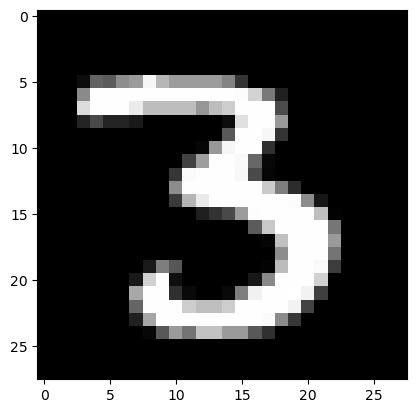

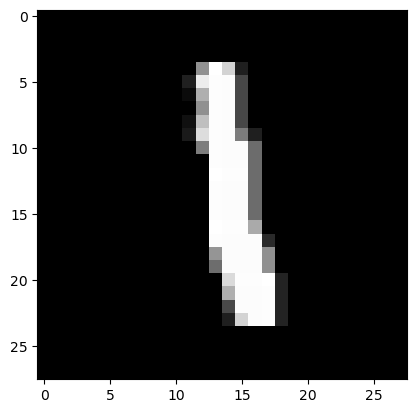

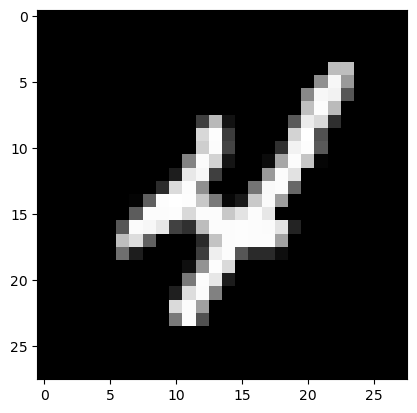

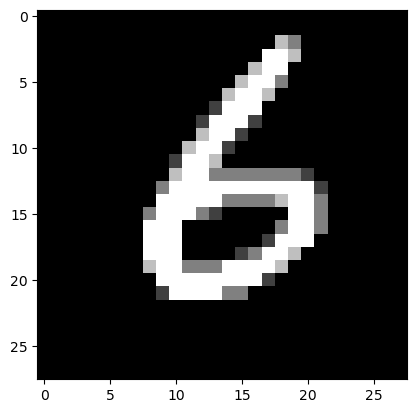

In [53]:
# Displaying a Grayscale Image
img = x_train[12]
img1 = x_train[6]
img2 = x_train[9]
img3 = x_train[66]

plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()
plt.imshow(np.squeeze(img1) ,cmap='gray')
plt.show()
plt.imshow(np.squeeze(img2) ,cmap='gray')
plt.show()
plt.imshow(np.squeeze(img3) ,cmap='gray')
plt.show()

In [54]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 66ms/step
predicted : 3


In [55]:
img1= img1.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img1])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 69ms/step
predicted : 1


In [56]:
img2= img2.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img2])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 23ms/step
predicted : 4


In [57]:
img3= img3.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img3])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 41ms/step
predicted : 6
